http://tiny.cc/DecisionTrees


http://tiny.cc/04-07-2020


https://docs.google.com/document/d/1TOr5eifhDDeqtizzpk4qDPC9D9LjOwxFOZPbcIBBAEU/edit?usp=sharing


http://tiny.cc/OF-UF


In [ ]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
data.shape

(81, 4)

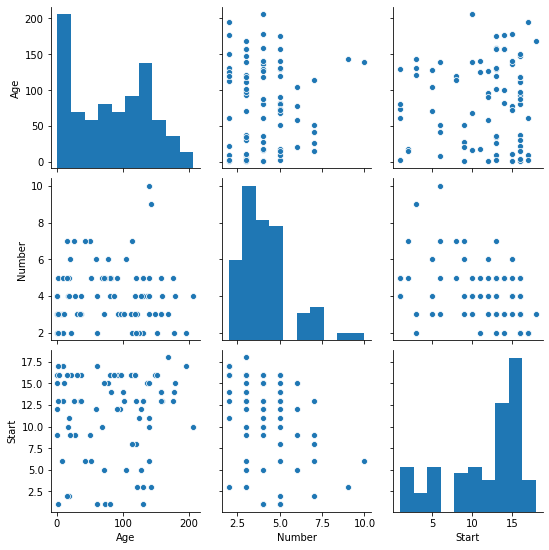

In [ ]:
sns.pairplot(data)

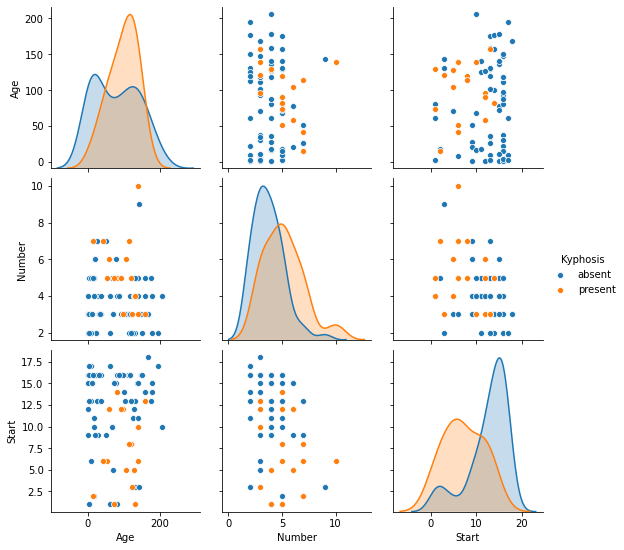

In [ ]:
sns.pairplot(data,hue='Kyphosis')

In [ ]:
#Splitting the data set into Input and Output
#X = data.iloc[:,1:]
X = data.drop('Kyphosis',axis=1)
y = data.Kyphosis

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#Apply the decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [ ]:
#Classification Report on training data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]])

In [ ]:
#Prediction on test data(unseen data)
#Syntax: objectname.predict(InputValues)
y_train_pred=dtree.predict(X_test) #corresponding output of X_test is stored in y_test
#Compare the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test,y_train_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



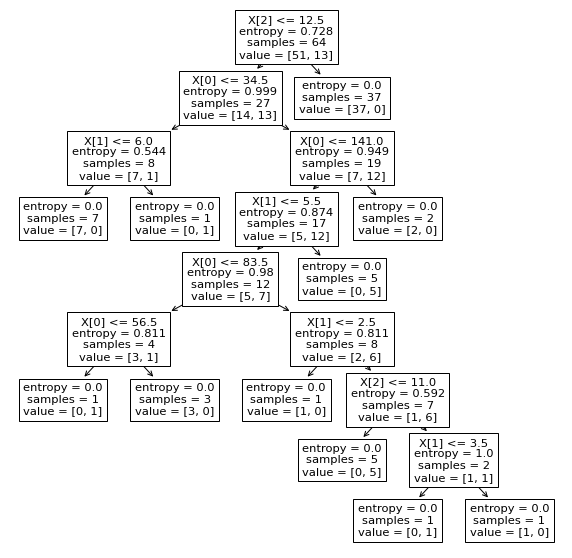

In [ ]:
#Visualization of the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtree)
plt.show()

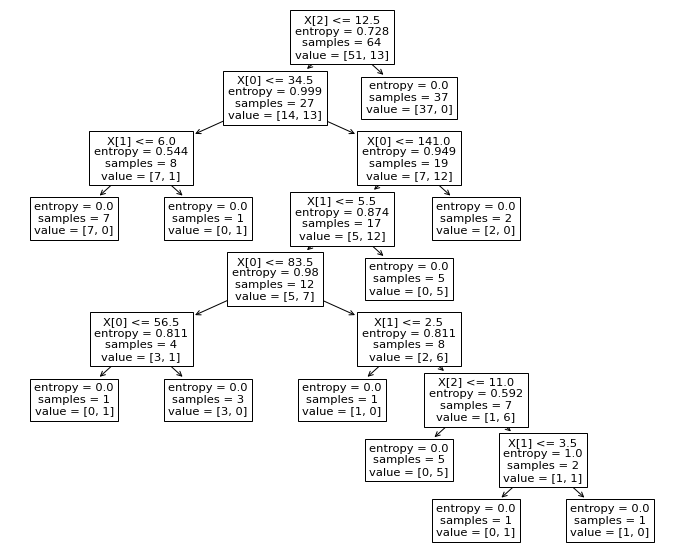

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()


In [ ]:
#KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.84615385, 0.92307692, 0.84615385, 0.76923077, 0.75      ])

In [ ]:
#Without splitting if we diectly build the mode-->we will not able to test

In [ ]:
#Hyperparameters
#GridSearchCV-->find optimum parameters
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(2,10,1),
            'min_samples_leaf':range(1,10,1)}

In [ ]:
#
from sklearn.model_selection import GridSearchCV 

#initialization
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param)

#applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [ ]:
#return the optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9}

In [ ]:
#We have to build the model with best parameters
#Initialized the DT Classifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)

#We need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Prediction on test data
pred_test=clf.predict(X_test)

#Classification report of actual values and predicted value(GridSearch)
print(classification_report(y_test,pred_test))


              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17

